In [1]:
import tensorflow as tf

import numpy as np
import os
import time

In [2]:
from glob import glob

In [20]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from sklearn.model_selection import train_test_split

import unicodedata
import re
import io

In [7]:
# read sequences
files= glob( 'C:/mestrado/originais/datasets/score_sheet/aberto_carnaval/datasets/carnaval_fullpage/labels/*.pgn')

In [8]:
len( files)

684

In [11]:
def read_label( path):
  f= open( path)
  d= f.read()
  f.close()
  return d 

In [46]:
labels= [read_label( f) for f in files]
labels= [lab.split() for lab in labels]
labels= [x[0:16] for x in labels]
labels= [" ".join( splitted) for splitted in labels]
labels= ['<start> ' + label + ' <end>' for label in labels]


In [47]:
labels[0]

'<start> d4 Nf6 c4 g6 Nc3 Bg7 e4 d6 Be2 O-O Be3 Na6 Nf3 e5 O-O Ng4 <end>'

In [48]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words=5000,
                                                oov_token="<unk>",
                                                filters= ' ')
                                                # filters='!"#$%&()*+.,-/:;=?@[\]^_`{|}~ ')

#forca a usar sempre uma lista com todas as words com 1 ocorrecia de cada word
tokenizer.fit_on_texts(labels)
tokenizer.word_index['<pad>'] = 0
tokenizer.index_word[0] = '<pad>'
#tokenizer.fit_on_texts([" ".join( _unique_labels)])


In [49]:
len( tokenizer.word_index)

263

In [ ]:
# 3. Cria par deslocando uma casa
def create_dataset(num_examples):
  word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in labels[:num_examples]]

  return zip(*word_pairs)

In [21]:
a = ("John", "Charles", "Mike")
b = ("Jenny", "Christy", "Monica", "Vicky")

x = zip(a, b)

#use the tuple() function to display a readable version of the result:

print(tuple(x))

(('John', 'Jenny'), ('Charles', 'Christy'), ('Mike', 'Monica'))


In [22]:
print( x)

In [24]:
z, t= x

ValueError: not enough values to unpack (expected 2, got 0)

In [25]:
# Download the file
path_to_zip = tf.keras.utils.get_file(
    'spa-eng.zip', origin='http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip',
    extract=True)

path_to_file = os.path.dirname(path_to_zip)+"/spa-eng/spa.txt"

2646016/2638744 [==============================] - 0s 0us/step


In [26]:
# Converts the unicode file to ascii
def unicode_to_ascii(s):
  return ''.join(c for c in unicodedata.normalize('NFD', s)
      if unicodedata.category(c) != 'Mn')


def preprocess_sentence(w):
  w = unicode_to_ascii(w.lower().strip())

  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
  w = re.sub(r"([?.!,¿])", r" \1 ", w)
  w = re.sub(r'[" "]+', " ", w)

  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
  w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)

  w = w.strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  return w

In [27]:
en_sentence = u"May I borrow this book?"
sp_sentence = u"¿Puedo tomar prestado este libro?"
print(preprocess_sentence(en_sentence))
print(preprocess_sentence(sp_sentence).encode('utf-8'))

<start> may i borrow this book ? <end>
b'<start> \xc2\xbf puedo tomar prestado este libro ? <end>'


In [28]:
# 1. Remove the accents
# 2. Clean the sentences
# 3. Return word pairs in the format: [ENGLISH, SPANISH]
def create_dataset(path, num_examples):
  lines = io.open(path, encoding='UTF-8').read().strip().split('\n')

  word_pairs = [[preprocess_sentence(w) for w in l.split('\t')]  for l in lines[:num_examples]]

  return zip(*word_pairs)

In [29]:
en, sp = create_dataset(path_to_file, None)
print(en[-1])
print(sp[-1])

<start> if you want to sound like a native speaker , you must be willing to practice saying the same sentence over and over in the same way that banjo players practice the same phrase over and over until they can play it correctly and at the desired tempo . <end>
<start> si quieres sonar como un hablante nativo , debes estar dispuesto a practicar diciendo la misma frase una y otra vez de la misma manera en que un musico de banjo practica el mismo fraseo una y otra vez hasta que lo puedan tocar correctamente y en el tiempo esperado . <end>


In [30]:
print( path_to_file)

C:\Users\hayashi\.keras\datasets/spa-eng/spa.txt


In [36]:
x= [[1, 2], [3,4], [5, 6]]

In [39]:
a, b= zip([1, 2], [3,4], [5, 6])

In [50]:
labels

['<start> d4 Nf6 c4 g6 Nc3 Bg7 e4 d6 Be2 O-O Be3 Na6 Nf3 e5 O-O Ng4 <end>',
 '<start> e4 c5 Nf3 e6 d4 cxd4 Nxd4 Nf6 Nc3 d6 Bb5+ Nbd7 O-O Be7 Be3 O-O <end>',
 '<start> e4 e5 Nf3 Nc6 Bc4 Nf6 Ng5 d5 exd5 Na5 Bb5+ c6 dxc6 bxc6 Bd3 Nd5 <end>',
 '<start> e4 c5 Nf3 e6 d4 cxd4 Nxd4 a6 c4 Qc7 Nc3 Nf6 Be3 Bb4 Qd2 Nxe4 <end>',
 '<start> d4 c6 Nf3 d5 c3 Nf6 Bf4 g6 e3 Bg7 Nbd2 O-O Bd3 Nbd7 Ne5 Nh5 <end>',
 '<start> e4 c5 Nf3 d6 d4 cxd4 Nxd4 Nf6 Nc3 g6 f4 Nc6 Bb5 Bd7 Be3 Bg7 <end>',
 '<start> c4 e5 Nc3 Nf6 g3 c5 e3 Nc6 Nge2 Bd6 Bg2 b6 O-O Bb7 d4 exd4 <end>',
 '<start> e4 e5 d4 exd4 Qxd4 Nc6 Qe3 d6 Nc3 g6 Bd2 Bg7 O-O-O Be6 f3 Qd7 <end>',
 '<start> f4 d5 Nf3 Nf6 e3 g6 Be2 Bg7 O-O O-O Qe1 c5 d3 Nc6 Qh4 Bg4 <end>',
 '<start> c4 c6 Nf3 d5 d4 Nf6 g3 Bf5 Nc3 e6 Nh4 Be4 f3 Bg6 Qb3 Qb6 <end>',
 '<start> e4 e5 Nf3 Nc6 Bb5 g6 Bxc6 dxc6 O-O Bg7 d3 Nf6 Nc3 Bg4 Be3 b6 <end>',
 '<start> Nf3 Nf6 g3 d5 c4 e6 b3 Be7 Bb2 O-O Bg2 Nbd7 O-O c6 d3 Re8 <end>',
 '<start> e4 e5 Nf3 Nc6 d4 exd4 c3 d3 Bxd3 Bc5 Bc4 d6 O-O Nf6 b

In [57]:
labels_tensor= tokenizer.texts_to_sequences( labels)
labels_tensor= tf.keras.preprocessing.sequence.pad_sequences(labels_tensor,
                                                         padding='post')

In [58]:
labels_tensor

array([[  2,   7,   6, ...,   4, 113,   3],
       [  2,   8,  10, ...,  30,   4,   3],
       [  2,   8,  18, ...,  29,  72,   3],
       ...,
       [  2,   8,  10, ...,  47,  54,   3],
       [  2,   7,   6, ...,   9,  41,   3],
       [  2,   7,   6, ...,  26,  33,   3]])

In [70]:
target1_tensor= labels_tensor[:,1:]

In [71]:
target_tensor= labels_tensor[:,:]

In [72]:
target_tensor

array([[  2,   7,   6, ...,   4, 113,   3],
       [  2,   8,  10, ...,  30,   4,   3],
       [  2,   8,  18, ...,  29,  72,   3],
       ...,
       [  2,   8,  10, ...,  47,  54,   3],
       [  2,   7,   6, ...,   9,  41,   3],
       [  2,   7,   6, ...,  26,  33,   3]])

In [73]:
input_tensor_train, input_tensor_val, target_tensor_train, target_tensor_val =train_test_split( labels_tensor, target_tensor, test_size= 0.2)

In [74]:
print(len(input_tensor_train), len(target_tensor_train), len(input_tensor_val), len(target_tensor_val))

547 547 137 137


In [75]:
def convert(lang, tensor):
  for t in tensor:
    if t!=0:
      print ("%d ----> %s" % (t, lang.index_word[t]))

In [76]:
convert( tokenizer, input_tensor_train[0])

2 ----> <start>
8 ----> e4
10 ----> c5
5 ----> nf3
13 ----> e6
24 ----> d3
11 ----> nc6
20 ----> g3
6 ----> nf6
21 ----> bg2
12 ----> d5
85 ----> qe2
22 ----> be7
4 ----> o-o
4 ----> o-o
18 ----> e5
61 ----> nd7
3 ----> <end>


In [77]:
print ("Input Language; index to word mapping")
convert(tokenizer, input_tensor_train[0])
print ()
print ("Target Language; index to word mapping")
convert(tokenizer, target_tensor_train[0])

Input Language; index to word mapping
2 ----> <start>
8 ----> e4
10 ----> c5
5 ----> nf3
13 ----> e6
24 ----> d3
11 ----> nc6
20 ----> g3
6 ----> nf6
21 ----> bg2
12 ----> d5
85 ----> qe2
22 ----> be7
4 ----> o-o
4 ----> o-o
18 ----> e5
61 ----> nd7
3 ----> <end>

Target Language; index to word mapping
2 ----> <start>
8 ----> e4
10 ----> c5
5 ----> nf3
13 ----> e6
24 ----> d3
11 ----> nc6
20 ----> g3
6 ----> nf6
21 ----> bg2
12 ----> d5
85 ----> qe2
22 ----> be7
4 ----> o-o
4 ----> o-o
18 ----> e5
61 ----> nd7
3 ----> <end>


In [79]:
inp_lang= tokenizer
targ_lang= tokenizer

In [80]:
BUFFER_SIZE = len(input_tensor_train)
BATCH_SIZE = 64
steps_per_epoch = len(input_tensor_train)//BATCH_SIZE
embedding_dim = 256
units = 1024
vocab_inp_size = len(inp_lang.word_index)+1
vocab_tar_size = len(targ_lang.word_index)+1

dataset = tf.data.Dataset.from_tensor_slices((input_tensor_train, target_tensor_train)).shuffle(BUFFER_SIZE)
dataset = dataset.batch(BATCH_SIZE, drop_remainder=True)

In [81]:
example_input_batch, example_target_batch = next(iter(dataset))
example_input_batch.shape, example_target_batch.shape

(TensorShape([64, 18]), TensorShape([64, 18]))

In [82]:
class Encoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, enc_units, batch_sz):
    super(Encoder, self).__init__()
    self.batch_sz = batch_sz
    self.enc_units = enc_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.enc_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')

  def call(self, x, hidden):
    x = self.embedding(x)
    output, state = self.gru(x, initial_state = hidden)
    return output, state

  def initialize_hidden_state(self):
    return tf.zeros((self.batch_sz, self.enc_units))

In [83]:
encoder = Encoder(vocab_inp_size, embedding_dim, units, BATCH_SIZE)

# sample input
sample_hidden = encoder.initialize_hidden_state()
sample_output, sample_hidden = encoder(example_input_batch, sample_hidden)
print ('Encoder output shape: (batch size, sequence length, units) {}'.format(sample_output.shape))
print ('Encoder Hidden state shape: (batch size, units) {}'.format(sample_hidden.shape))

Encoder output shape: (batch size, sequence length, units) (64, 18, 1024)
Encoder Hidden state shape: (batch size, units) (64, 1024)


In [84]:
class BahdanauAttention(tf.keras.layers.Layer):
  def __init__(self, units):
    super(BahdanauAttention, self).__init__()
    self.W1 = tf.keras.layers.Dense(units)
    self.W2 = tf.keras.layers.Dense(units)
    self.V = tf.keras.layers.Dense(1)

  def call(self, query, values):
    # query hidden state shape == (batch_size, hidden size)
    # query_with_time_axis shape == (batch_size, 1, hidden size)
    # values shape == (batch_size, max_len, hidden size)
    # we are doing this to broadcast addition along the time axis to calculate the score
    query_with_time_axis = tf.expand_dims(query, 1)

    # score shape == (batch_size, max_length, 1)
    # we get 1 at the last axis because we are applying score to self.V
    # the shape of the tensor before applying self.V is (batch_size, max_length, units)
    score = self.V(tf.nn.tanh(
        self.W1(query_with_time_axis) + self.W2(values)))

    # attention_weights shape == (batch_size, max_length, 1)
    attention_weights = tf.nn.softmax(score, axis=1)

    # context_vector shape after sum == (batch_size, hidden_size)
    context_vector = attention_weights * values
    context_vector = tf.reduce_sum(context_vector, axis=1)

    return context_vector, attention_weights

In [85]:
attention_layer = BahdanauAttention(10)
attention_result, attention_weights = attention_layer(sample_hidden, sample_output)

print("Attention result shape: (batch size, units) {}".format(attention_result.shape))
print("Attention weights shape: (batch_size, sequence_length, 1) {}".format(attention_weights.shape))

Attention result shape: (batch size, units) (64, 1024)
Attention weights shape: (batch_size, sequence_length, 1) (64, 18, 1)


In [87]:
class Decoder(tf.keras.Model):
  def __init__(self, vocab_size, embedding_dim, dec_units, batch_sz):
    super(Decoder, self).__init__()
    self.batch_sz = batch_sz
    self.dec_units = dec_units
    self.embedding = tf.keras.layers.Embedding(vocab_size, embedding_dim)
    self.gru = tf.keras.layers.GRU(self.dec_units,
                                   return_sequences=True,
                                   return_state=True,
                                   recurrent_initializer='glorot_uniform')
    self.fc = tf.keras.layers.Dense(vocab_size)

    # used for attention
    self.attention = BahdanauAttention(self.dec_units)

  def call(self, x, hidden, enc_output):
    # enc_output shape == (batch_size, max_length, hidden_size)
    context_vector, attention_weights = self.attention(hidden, enc_output)

    # x shape after passing through embedding == (batch_size, 1, embedding_dim)
    x = self.embedding(x)

    # x shape after concatenation == (batch_size, 1, embedding_dim + hidden_size)
    x = tf.concat([tf.expand_dims(context_vector, 1), x], axis=-1)

    # passing the concatenated vector to the GRU
    output, state = self.gru(x)

    # output shape == (batch_size * 1, hidden_size)
    output = tf.reshape(output, (-1, output.shape[2]))

    # output shape == (batch_size, vocab)
    x = self.fc(output)

    return x, state, attention_weights

In [88]:
decoder = Decoder(vocab_tar_size, embedding_dim, units, BATCH_SIZE)

sample_decoder_output, _, _ = decoder(tf.random.uniform((BATCH_SIZE, 1)),
                                      sample_hidden, sample_output)

print ('Decoder output shape: (batch_size, vocab size) {}'.format(sample_decoder_output.shape))

Decoder output shape: (batch_size, vocab size) (64, 264)


In [89]:
optimizer = tf.keras.optimizers.Adam()
loss_object = tf.keras.losses.SparseCategoricalCrossentropy(
    from_logits=True, reduction='none')

def loss_function(real, pred):
  mask = tf.math.logical_not(tf.math.equal(real, 0))
  loss_ = loss_object(real, pred)

  mask = tf.cast(mask, dtype=loss_.dtype)
  loss_ *= mask

  return tf.reduce_mean(loss_)

In [90]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(optimizer=optimizer,
                                 encoder=encoder,
                                 decoder=decoder)

In [91]:
@tf.function
def train_step(inp, targ, enc_hidden):
  loss = 0

  with tf.GradientTape() as tape:
    enc_output, enc_hidden = encoder(inp, enc_hidden)

    dec_hidden = enc_hidden

    dec_input = tf.expand_dims([targ_lang.word_index['<start>']] * BATCH_SIZE, 1)

    # Teacher forcing - feeding the target as the next input
    for t in range(1, targ.shape[1]):
      # passing enc_output to the decoder
      predictions, dec_hidden, _ = decoder(dec_input, dec_hidden, enc_output)

      loss += loss_function(targ[:, t], predictions)

      # using teacher forcing
      dec_input = tf.expand_dims(targ[:, t], 1)

  batch_loss = (loss / int(targ.shape[1]))

  variables = encoder.trainable_variables + decoder.trainable_variables

  gradients = tape.gradient(loss, variables)

  optimizer.apply_gradients(zip(gradients, variables))

  return batch_loss

In [95]:
EPOCHS = 5

for epoch in range(EPOCHS):
  start = time.time()

  enc_hidden = encoder.initialize_hidden_state()
  total_loss = 0

  for (batch, (inp, targ)) in enumerate(dataset.take(steps_per_epoch)):
    batch_loss = train_step(inp, targ, enc_hidden)
    total_loss += batch_loss

    if batch % 100 == 0:
      print('Epoch {} Batch {} Loss {:.4f}'.format(epoch + 1,
                                                   batch,
                                                   batch_loss.numpy()))
  # saving (checkpoint) the model every 2 epochs
  if (epoch + 1) % 2 == 0:
    checkpoint.save(file_prefix = checkpoint_prefix)

  print('Epoch {} Loss {:.4f}'.format(epoch + 1,
                                      total_loss / steps_per_epoch))
  print('Time taken for 1 epoch {} sec\n'.format(time.time() - start))

Epoch 1 Batch 0 Loss 0.0734
Epoch 1 Loss 0.1413
Time taken for 1 epoch 13.178000450134277 sec

Epoch 2 Batch 0 Loss 0.1519
Epoch 2 Loss 0.1427
Time taken for 1 epoch 14.893232107162476 sec

Epoch 3 Batch 0 Loss 0.1042
Epoch 3 Loss 0.2226
Time taken for 1 epoch 13.69899868965149 sec

Epoch 4 Batch 0 Loss 0.2022
Epoch 4 Loss 0.2613
Time taken for 1 epoch 14.632159948348999 sec

Epoch 5 Batch 0 Loss 0.1592
Epoch 5 Loss 0.1510
Time taken for 1 epoch 13.435999393463135 sec



In [101]:
max_length_targ= 18
max_length_inp= 18
def evaluate(sentence):
  attention_plot = np.zeros((max_length_targ, max_length_inp))

  sentence = preprocess_sentence(sentence)

  inputs = [inp_lang.word_index[i] for i in sentence.split(' ')]
  inputs = tf.keras.preprocessing.sequence.pad_sequences([inputs],
                                                         maxlen=max_length_inp,
                                                         padding='post')
  inputs = tf.convert_to_tensor(inputs)

  result = ''

  hidden = [tf.zeros((1, units))]
  enc_out, enc_hidden = encoder(inputs, hidden)

  dec_hidden = enc_hidden
  dec_input = tf.expand_dims([targ_lang.word_index['<start>']], 0)

  for t in range(max_length_targ):
    predictions, dec_hidden, attention_weights = decoder(dec_input,
                                                         dec_hidden,
                                                         enc_out)

    # storing the attention weights to plot later on
    attention_weights = tf.reshape(attention_weights, (-1, ))
    attention_plot[t] = attention_weights.numpy()

    predicted_id = tf.argmax(predictions[0]).numpy()

    result += targ_lang.index_word[predicted_id] + ' '

    if targ_lang.index_word[predicted_id] == '<end>':
      return result, sentence, attention_plot

    # the predicted ID is fed back into the model
    dec_input = tf.expand_dims([predicted_id], 0)

  return result, sentence, attention_plot

In [98]:
# function for plotting the attention weights
def plot_attention(attention, sentence, predicted_sentence):
  fig = plt.figure(figsize=(10,10))
  ax = fig.add_subplot(1, 1, 1)
  ax.matshow(attention, cmap='viridis')

  fontdict = {'fontsize': 14}

  ax.set_xticklabels([''] + sentence, fontdict=fontdict, rotation=90)
  ax.set_yticklabels([''] + predicted_sentence, fontdict=fontdict)

  ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
  ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

  plt.show()

In [96]:
def preprocess_sentence(w):
#   w = unicode_to_ascii(w.lower().strip())

  # creating a space between a word and the punctuation following it
  # eg: "he is a boy." => "he is a boy ."
  # Reference:- https://stackoverflow.com/questions/3645931/python-padding-punctuation-with-white-spaces-keeping-punctuation
#   w = re.sub(r"([?.!,¿])", r" \1 ", w)
#   w = re.sub(r'[" "]+', " ", w)

  # replacing everything with space except (a-z, A-Z, ".", "?", "!", ",")
#   w = re.sub(r"[^a-zA-Z?.!,¿]+", " ", w)

  w = w.strip()

  # adding a start and an end token to the sentence
  # so that the model know when to start and stop predicting.
  w = '<start> ' + w + ' <end>'
  return w

In [99]:
def translate(sentence):
  result, sentence, attention_plot = evaluate(sentence)

  print('Input: %s' % (sentence))
  print('Predicted translation: {}'.format(result))

  attention_plot = attention_plot[:len(result.split(' ')), :len(sentence.split(' '))]
  plot_attention(attention_plot, sentence.split(' '), result.split(' '))

Input: <start> d4 nf6 c4 g6 nc3 bg7 e4 d6 be2 o-o be3 na6 nf3 e5 o-o ng4 <end>
Predicted translation: d4 nf6 c4 g6 nc3 bg7 e4 d6 be2 o-o be3 na6 nf3 e5 o-o ng4 <end> 


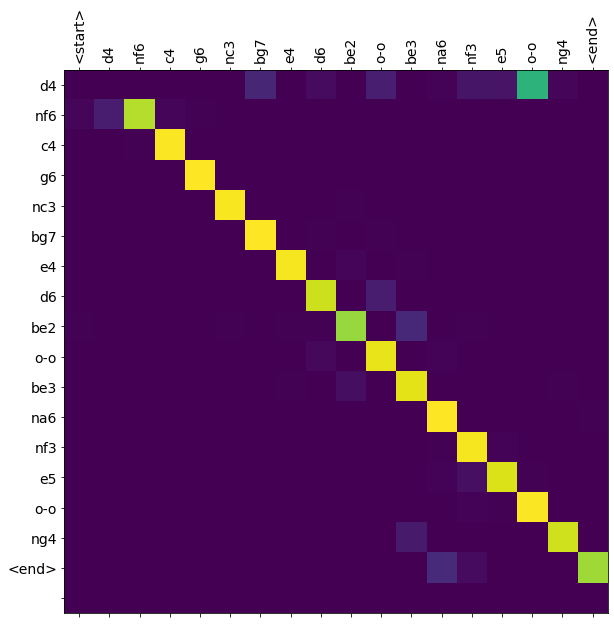

Input: <start> e4 c5 nf3 e6 d4 cxd4 nxd4 nf6 nc3 d6 bb5+ nbd7 o-o be7 be3 o-o <end>
Predicted translation: e4 c5 nf3 e6 d4 cxd4 nxd4 nf6 nc3 d6 bb5+ nbd7 o-o be7 be3 o-o <end> 


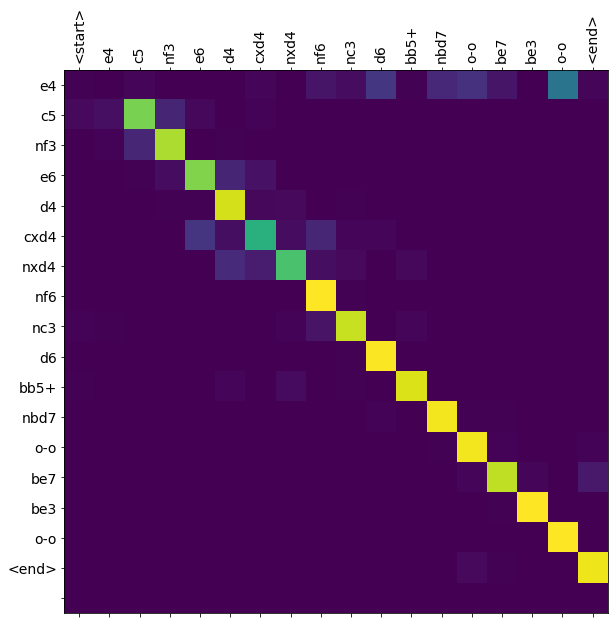

Input: <start> e4 e5 nf3 nc6 bc4 nf6 ng5 d5 exd5 na5 bb5+ c6 dxc6 bxc6 bd3 nd5 <end>
Predicted translation: e4 e5 nf3 nc6 bc4 nf6 ng5 d5 exd5 cxd5 nxf4 c6 d3 d5 <end> 


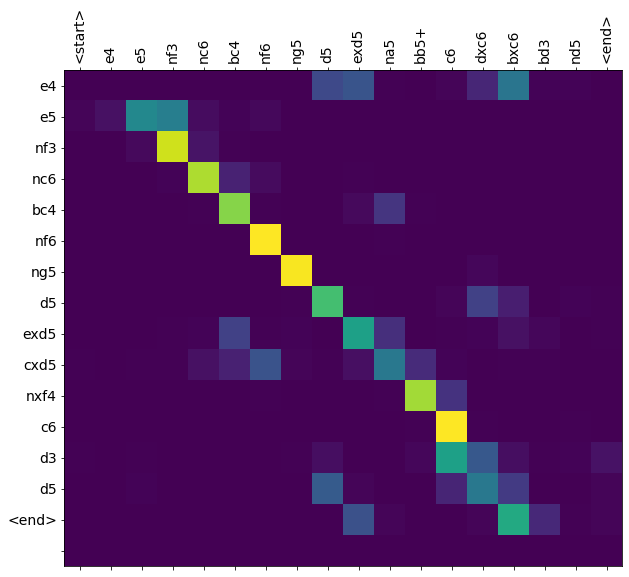

Input: <start> e4 c5 nf3 e6 d4 cxd4 nxd4 a6 c4 qc7 nc3 nf6 be3 bb4 qd2 nxe4 <end>
Predicted translation: e4 c5 nf3 e6 d4 cxd4 nxd4 a6 c4 qc7 nc3 nf6 be3 bb4 qd2 nxe4 <end> 


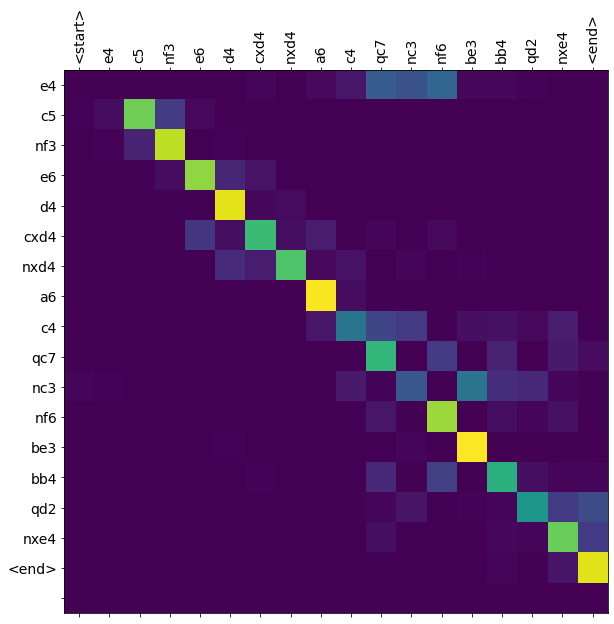

In [117]:
for i in range( 0,4):
    translate( " ".join( labels[i].split()[1:-1]).lower())

In [114]:
" ".join( labels[0].split()[1:-1])

'd4 Nf6 c4 g6 Nc3 Bg7 e4 d6 Be2 O-O Be3 Na6 Nf3 e5 O-O Ng4'